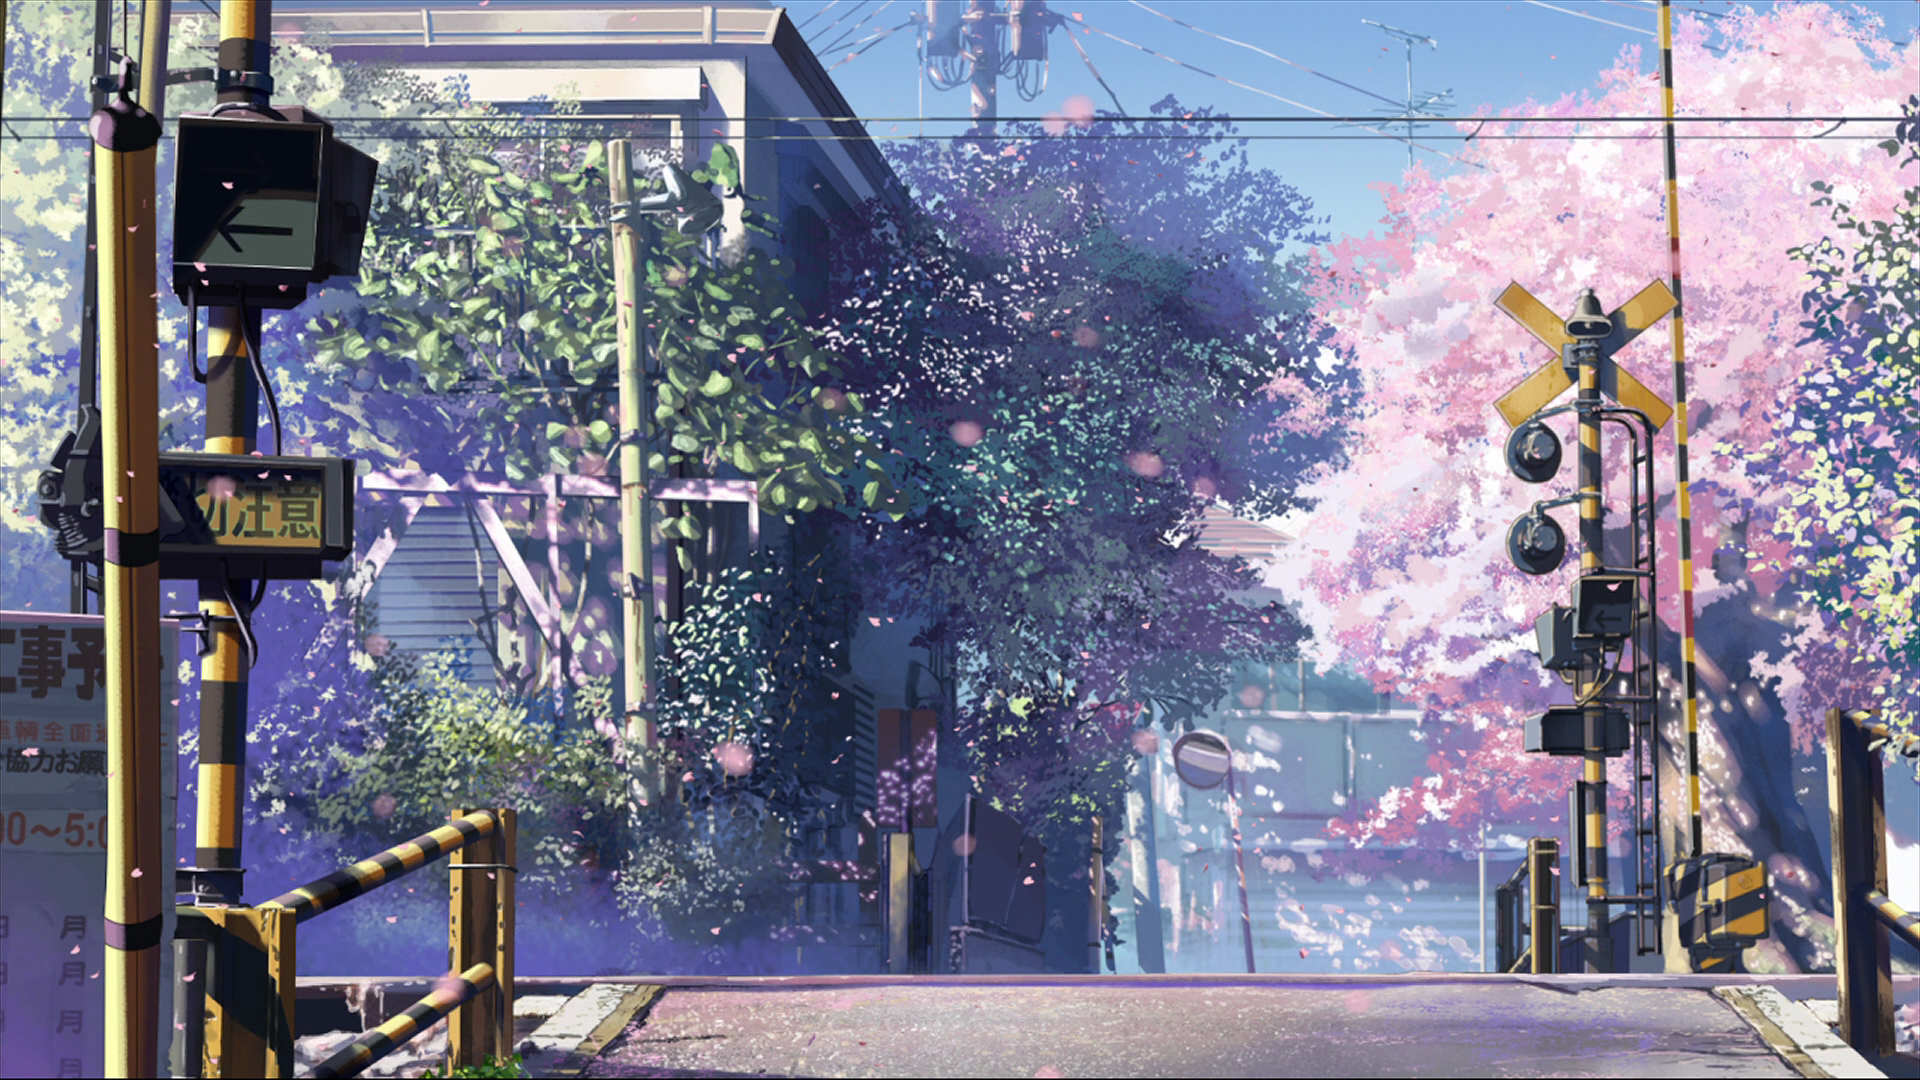



# **Data Science Project:**
# **Recommendation System for Anime**

**Group Members List:**
1.   Muhammad Abdullah Younus     F2018054005
2.   Muhammad Arsalan Shahzad     F2018054013
3.   Muhammad Bilal               F2018054046
4.   Mhammad Bilal Tahir          F2018054042


**Machine Learning:**

It is the subfield of computer science that gives computers the ability to learn without being explicitly programmed.

**A few types of Machine Learning:**
1.   Regression
2.   Classification
3.   Clustering
4.   Recommendation systems

**What are recommendation systems:**

Recommendation systems are a collection of algorithms used to recommend items to users based on information taken from the user. 

In this notebook, we will explore recommendation systems based on collaborative filltering and implement a simple version of a recommendation system.

**Dataset chosen:**

We have chosen the following two datasets:
1. anime.csv
2. rating.csv

Anime.csv holds the information about almost 12,000 animes, for example; anime name, genre, episode list, anime type etc.

Rating.csv holds the information of ratings from around 100,000 users, for example; ratings of users against the respected anime_id.

**Source of Datasets:**

www.Kaggle.com


**What each column represents:**

1. **anime_id:** id number of each anime

2. **name:** title of the anime

3. **genre:** category

4. **type:** separates the anime into categories eg tv, movies, OVA, etc

5. **episodes:** total number of episodes

6. **rating:** -1–10, lowest to highest

7. **members:** number of users that rated an anime


# **Table of Contents:**
1. Data Loading
2. Preprocessing (Data Wrangling)
3. Data Visualization & Groupby
4. Recommendation System (Collaborative filtering)
5. Machine Learning Techniques (Multiple Linear Regression)

# **Data Loading:**

We will load the data from our device into Colobarotary for Pre-processing.

**Steps:**
1. Click the  "Files" option at the top left.
2. Click "Upload the session".
3. Now upload the files from your device. 

Note: Colaboratory erases the files once you log out to save memory, so you will have to reload it when logging again.

# **Pre-processing:**

First, we will import Libraries into Colaboratry:

In [1]:
# Dataframe manipulation library
# Import Pandas Library for data analysis, math functions and to create a 2D table called Dataframe. 
import pandas as pd
# Import NumPy library for working with arrays and mathematical operations
import numpy as np
# Import Seaborn, which provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns
# Import Matplotlib for plotting
import matplotlib.pyplot as plt

Now we will read each file into their Dataframes:

In [2]:
#Storing the anime information into a pandas dataframe
anime = pd.read_csv('anime.csv')
#Storing the rating information into a pandas dataframe
rating = pd.read_csv('rating.csv')

Now let's take a look at how each of the datasets are organized:

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


We can clearly see that in anime dataset, each anime has a unique ID (anime_id), a title (name), and several different genres (genre) along with other types of columns as well.

The ratings dataset has unique user and anime ID's (anime_id, user_id). Every row in the ratings dataframe has a user id associated with at least one anime and the ratings that were given.

Note: Both datasets contain column named "anime_id" which we will later on merge together for computing purposes. 

Lets find the information about the datasets so we know what type of data we are working with.

In [5]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [7]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [8]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


Now we can retrieve any anime from the anime dataset with the following code which returns the anime listed with row number inside [ ].

In [9]:
#To retrieve rows from a Data frame we use the function loc
anime.loc[50]

anime_id                               7785
name                 Yojouhan Shinwa Taikei
genre       Mystery, Psychological, Romance
type                                     TV
episodes                                 11
rating                                 8.65
members                              122531
Name: 50, dtype: object

In [10]:
#Checking the distribution of ratings to see any irregularities
rating.rating.value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

# **Data Visualization & Groupby:**

In [11]:
#Checking the distribution of ratings to see any irregularities
rating.rating.value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [12]:
#As our Rating dataset has values of "-1" which will affect our calculations, therefore we will delete them as ratings are supposed to be from 1 till 10.
# "-1" value indicates that the user did not rate the anime.
rating = rating[rating["rating"] != -1]


**Finding Missing Values:**


In [13]:
#To find missing values in anime dataset
print("Anime missing values:\n")
anime.isnull().sum()

Anime missing values:



anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

The visualization below shows the missing value in anime dataset.

The Dark Blue area shows the area has no missing values.

The White/Peach area shows that area contains missing values.

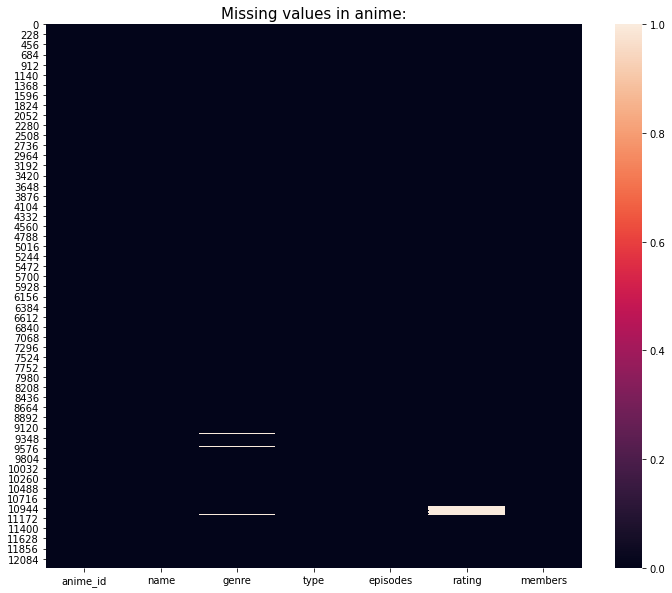

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(anime.isnull())
plt.title("Missing values in anime:", fontsize = 15)
plt.show()

In [15]:
#To find missing values in ratings dataset
print("Rating missing values:\n")
rating.isnull().sum()

Rating missing values:



user_id     0
anime_id    0
rating      0
dtype: int64

The visualization below shows the missing value in rating dataset.

As you can see that the whole region is pink, it means that there are no missing values in the rating dataset.


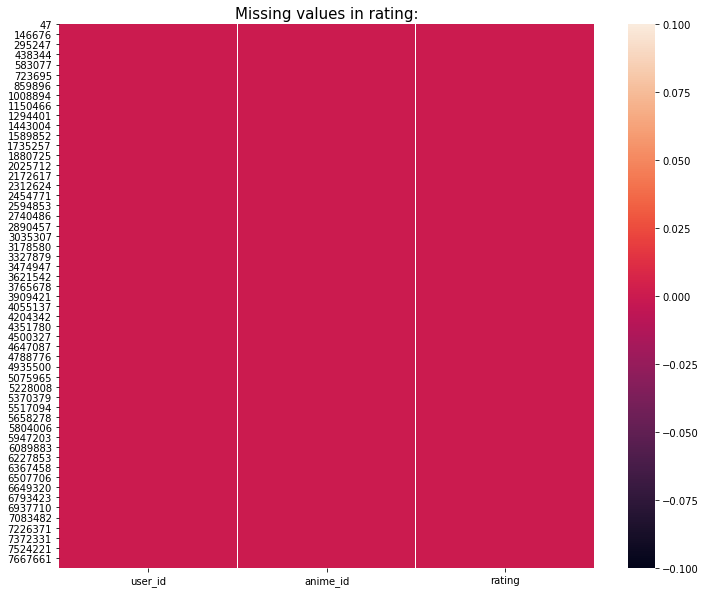

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(rating.isnull())
plt.title("Missing values in rating:", fontsize = 15)
plt.show()


**Filling Missing Values:**


In [17]:
# Now we will take mode of 'Type' and 'Genre' and mean of 'Rating'. We took mean of rating as it had numerical data and we needed the average value and not the most repeated value.
# We took the mode of type and genre as those columns contained caterogical data(non-numeric data eg characters) and filled missing values with the most repeated value.
print(anime['type'].mode())
print(anime['genre'].mode())
print(anime['rating'].mean())

0    TV
dtype: object
0    Hentai
dtype: object
6.473901690981445


In [18]:
# We will fill anime which have 0 rating with mean of rating:
anime['rating'] = anime['rating'].fillna(anime['rating'].dropna().mean())

# We will fill genre and type with their mode value respectively:
anime['genre'] = anime['genre'].fillna(anime['genre'].dropna().mode().values[0])

anime['type'] = anime['type'].fillna(anime['type'].dropna().mode().values[0])

# Now we will check if all null values are filled:
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


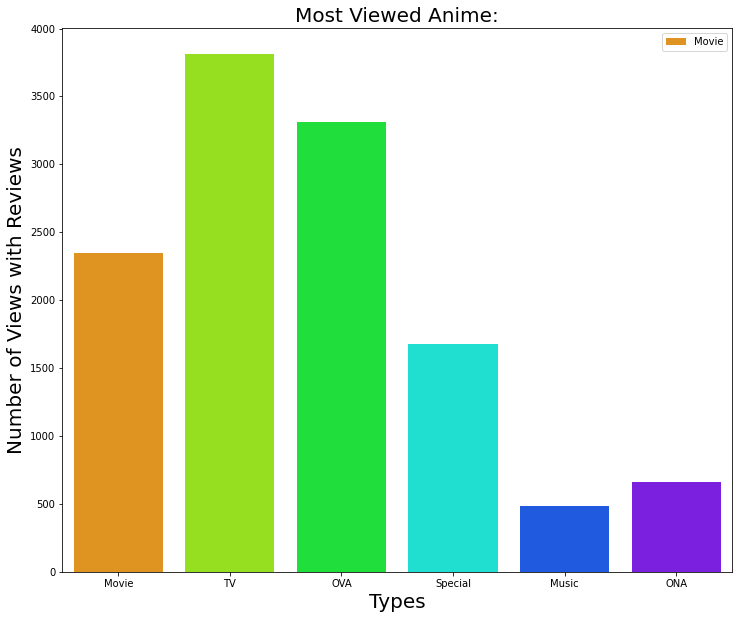

In [19]:
# Now we will visualize the most viewed type of anime:
fig = plt.figure(figsize=(12,10))
sns.countplot(anime['type'], palette='gist_rainbow')
plt.title("Most Viewed Anime:", fontsize=20)
plt.xlabel("Types", fontsize=20)
plt.ylabel("Number of Views with Reviews", fontsize = 20)
plt.legend(anime['type'])
plt.show()

In [20]:
# Now we will merge anime and rating using "anime_id" as reference and only keep required columns:
anime_df = pd.merge(rating,anime[["anime_id","name"]], left_on = "anime_id", right_on = "anime_id").drop("anime_id", axis = 1)
anime_df.head()

,user_id,rating,name
0,1,10,Highschool of the Dead
1,3,6,Highschool of the Dead
2,5,2,Highschool of the Dead
3,12,6,Highschool of the Dead
4,14,6,Highschool of the Dead


In [21]:
# Now we will count the number of ratings for each anime:
count_rating = anime_df.groupby("name")["rating"].count().sort_values(ascending = False)
count_rating

name
Death Note                         34226
Sword Art Online                   26310
Shingeki no Kyojin                 25290
Code Geass: Hangyaku no Lelouch    24126
Angel Beats!                       23565
                                   ...  
Ashita no Eleventachi                  1
Ashita e Mukau Hito                    1
Shounen Ninja Kaze no Fujimaru         1
Hi no Tori: Hagoromo-hen               1
Mechakko Dotakon                       1
Name: rating, Length: 9926, dtype: int64

In [24]:
# As you can see that some anime have only 1 rating, therefore we will ignore them so they do not affect our recommendation system results
# We will keep animes with ratings defined in the following variable 'r':
r = 5000
more_than_r_ratings = count_rating[count_rating.apply(lambda x: x >= r)].index

# Keep only the animes with at least r ratings in the DataFrame
anime_df_r = anime_df[anime_df['name'].apply(lambda x: x in more_than_r_ratings)]

In [27]:
# Now we will find the numder of anime and ratings in the respective datasets before and after filltering:
before = len(anime_df.name.unique())
after = len(anime_df_r.name.unique())
rows_before = anime_df.shape[0]
rows_after = anime_df_r.shape[0]
print(f'''There are: \n{before} animes before filtering and {after} animes after filtering \n{rows_before} rows before filtering and {rows_after} rows after filtering''')

There are: 
9926 animes before filtering and 279 animes after filtering 
6337239 rows before filtering and 2517097 rows after filtering


# **Recommendation System (Collaborative Filltering):**

The basic ideology of a collaborative filtering system is to predict/filter the interests of one user on an item by gathering preferences and information from many other users. 

For example, if a person 'A' has the same opinion as person 'B' on a certain issue, 'A' is more likely to share opinion of 'B' on another issue rather than that of a randomly chosen person.

In [28]:
# Now we will create a matrix with userId as rows and the names of the anime as column.
# Each cell will have the rating given by the user to the animes.
anime_df_recom = df_r.pivot_table(index='user_id',columns='name',values='rating')
anime_df_recom.iloc[:5,:5]

name,Accel World,Afro Samurai,Air,Air Gear,Akame ga Kill!
user_id,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,7.0,6.0,NaN,NaN,8.0
5,3.0,NaN,NaN,NaN,4.0
7,8.0,NaN,NaN,NaN,NaN


In [29]:
df_r.name.value_counts().head(10)

Death Note                            34226
Sword Art Online                      26310
Shingeki no Kyojin                    25290
Code Geass: Hangyaku no Lelouch       24126
Angel Beats!                          23565
Elfen Lied                            23528
Naruto                                22071
Fullmetal Alchemist: Brotherhood      21494
Fullmetal Alchemist                   21332
Code Geass: Hangyaku no Lelouch R2    21124
Name: name, dtype: int64

In [30]:
# Now we will get the correlation of one anime with another:

# Arguments given: 
# df (DataFrame):  with user_id as rows and movie titles as column and ratings as values
# name (str): Name of the anime

# Return: 
# DataFrame with the correlation of the anime with all others
def find_corr(anime_df, name):
    similar_to_anime = anime_df.corrwith(anime_df[name])
    similar_to_anime = pd.DataFrame(similar_to_anime,columns=['Correlation'])
    similar_to_anime = similar_to_anime.sort_values(by = 'Correlation', ascending = False)
    return similar_to_anime

**Check Recommendations:**

**Note:** 

1. The higher the correlation, the higher the possibility that the viewer of the selected anime will like the recommended anime.
2. Negative correlation means that the viewer is likely to dislikes the anime.

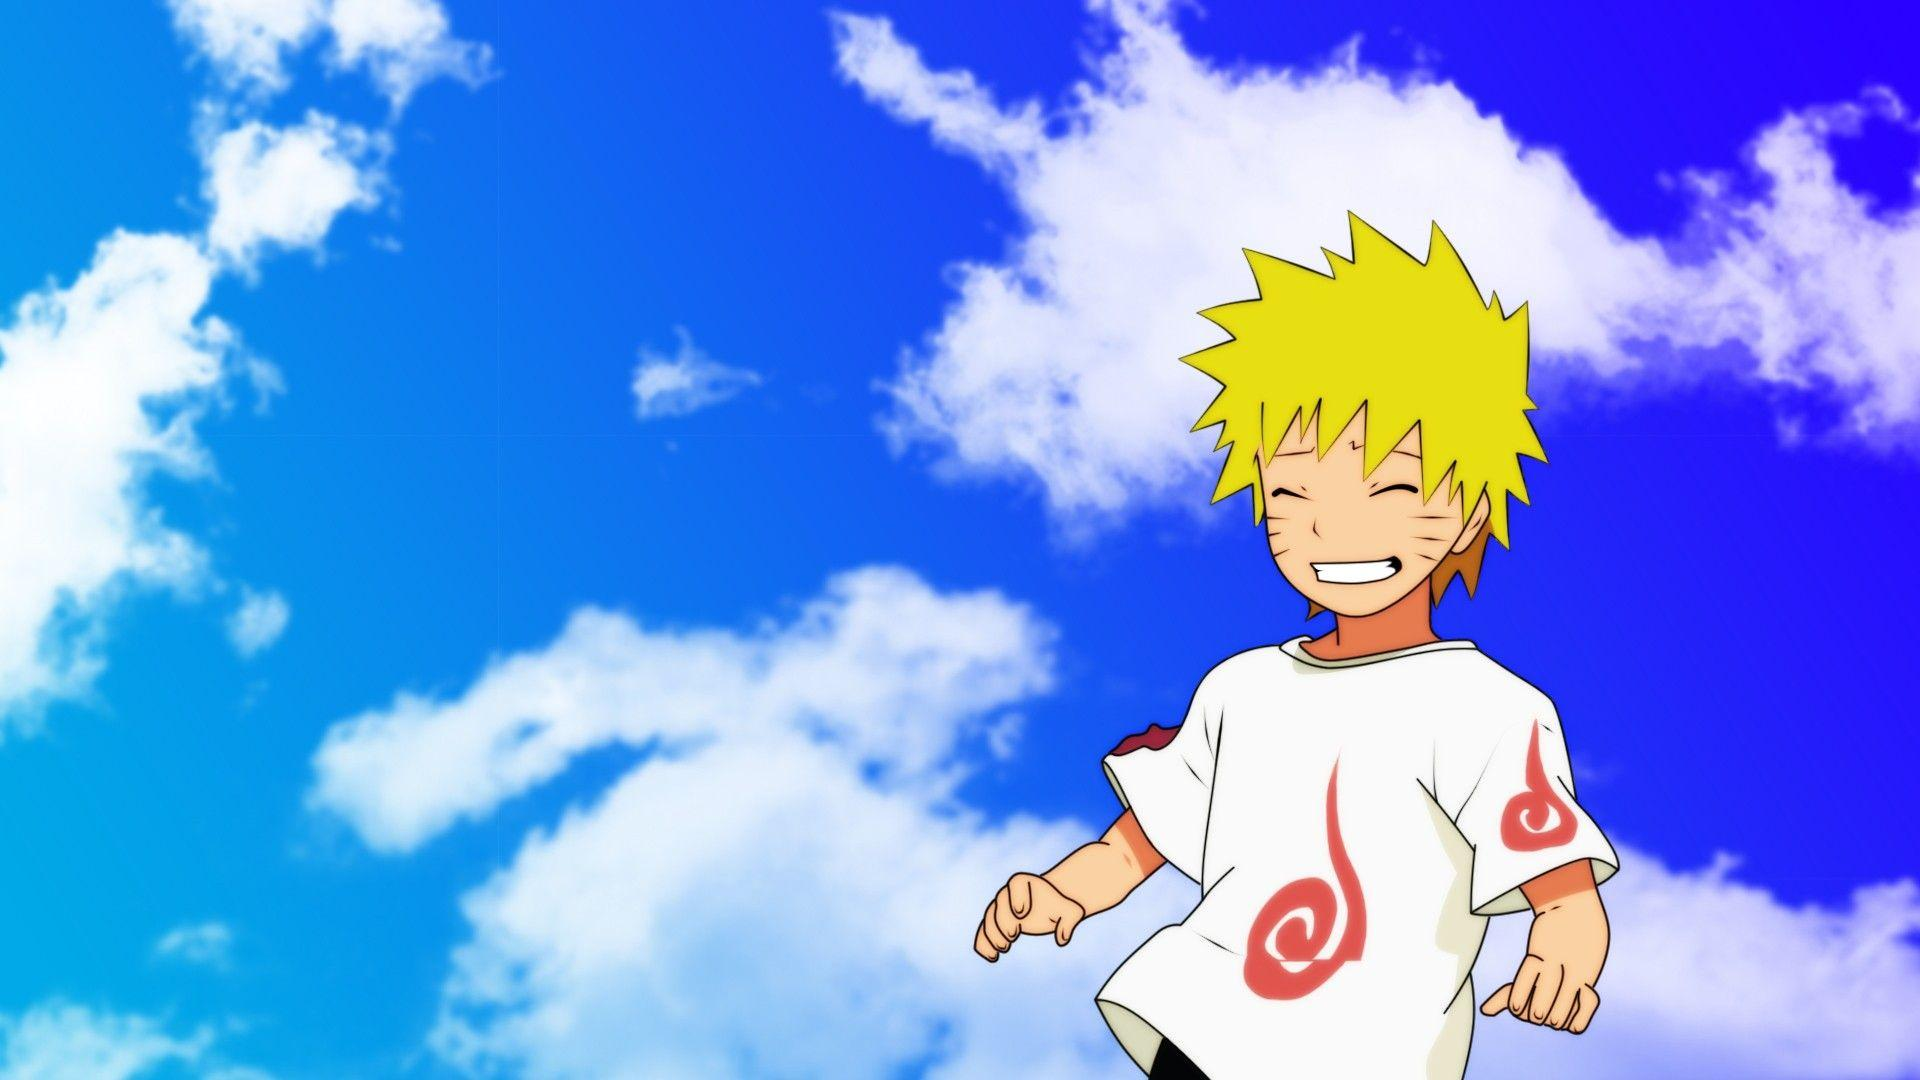

In [31]:
# Finding recommendations for anime "Naruto":
anime1 = 'Naruto'
find_corr(anime_df_recom, anime1).head(10)

,Correlation
name,
Naruto,1.000000
Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo!,0.582344
Naruto: Shippuuden Movie 1,0.578797
Bleach,0.547983
Fairy Tail,0.444271
Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru,0.439225
Dragon Ball Z,0.437442
InuYasha,0.433100
Dragon Ball GT,0.429704


In [32]:
# Following are not recommended for the viewer who wishes to watch "Naruto":
find_corr(anime_df_recom, anime1).tail(10)

,Correlation
name,
Neon Genesis Evangelion: The End of Evangelion,0.070812
Mahou Shoujo Madoka★Magica,0.070293
Paprika,0.065754
Cowboy Bebop,0.064961
NHK ni Youkoso!,0.063474
Ghost in the Shell,0.053962
FLCL,0.046725
Mushishi,0.037165
Baccano!,0.033748


In [33]:
# Finding recommendations for anime "Death Note":
anime2 = 'Death Note'
find_corr(anime_df_recom, anime2).head(10)

,Correlation
name,
Death Note,1.000000
Code Geass: Hangyaku no Lelouch R2,0.358927
Code Geass: Hangyaku no Lelouch,0.351290
Shingeki no Kyojin,0.346770
Naruto,0.313676
Final Fantasy VII: Advent Children,0.305436
Bleach,0.301795
Elfen Lied,0.297404
Dragon Ball Z,0.296798


In [34]:
# Following are not recommended for the viewer who wishes to watch "Death Note":
find_corr(anime_df_recom, anime2).tail(10)

,Correlation
name,
NHK ni Youkoso!,0.126408
Shinsekai yori,0.118927
Neon Genesis Evangelion,0.108453
Neon Genesis Evangelion: The End of Evangelion,0.104087
Mushishi,0.103755
Paprika,0.097125
Ghost in the Shell,0.088121
Cowboy Bebop,0.074552
FLCL,0.062253


In [35]:
# Finding recommendations for anime "Paprika":
anime3 = 'Paprika'
find_corr(anime_df_recom, anime3).head(10)

,Correlation
name,
Paprika,1.000000
Akira,0.338325
Serial Experiments Lain,0.337478
Nekomonogatari: Kuro,0.332688
Ghost in the Shell,0.329033
FLCL,0.326377
Kaze no Tani no Nausicaä,0.315381
Gake no Ue no Ponyo,0.314902
Cowboy Bebop: Tengoku no Tobira,0.307409


In [36]:
# Finding recommendations for anime "Nekomonogatari: Kuro":
anime4 = 'Nekomonogatari: Kuro'
find_corr(anime_df_recom, anime4).head(10)

,Correlation
name,
Nekomonogatari: Kuro,1.000000
Nisemonogatari,0.673337
Bakemonogatari,0.612669
Monogatari Series: Second Season,0.552913
Fate/stay night: Unlimited Blade Works,0.406778
Boku wa Tomodachi ga Sukunai Next,0.397338
Kara no Kyoukai 1: Fukan Fuukei,0.394091
Boku wa Tomodachi ga Sukunai,0.389942
Steins;Gate: Oukoubakko no Poriomania,0.388814


# **Machine Learning (Multiple Linear Regression):**

In [37]:
# We need the following columns so we are just going to get them instead of all columns:
df1 = rating[['user_id','anime_id','rating']]
df1.head(10)

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
156,3,20,8
157,3,154,6
158,3,170,9
159,3,199,10
160,3,225,9


In [38]:
# We will split our data into test and train sets, 0.8 indicates that 80% data will be stored in the variable.
# Random data was selected with the following code and as now the data is in arrays, the data has  been stored in true and false,
# "~" indicates that false data is stored in ~indx (test set) and true data is in indx (train set)
indx = np.random.rand(len(df1))<0.8
train = df1[indx]
test = df1[~indx]

In [39]:
# Now we can see the shape of our teat and train datasets:
train.shape, test.shape

((5071733, 3), (1265508, 3))

In [40]:
# Sklearn holds all the machine learning tools neccessary for us to execute a ML model.
from sklearn import linear_model
mlreg = linear_model.LinearRegression()
# We have divdied our train data into independent variable and dependent variable e.g x and y
train_x = np.asanyarray(train[['user_id', 'anime_id']]) # use doudle array [[ ]] or else it will give error
train_y = np.asanyarray(train['rating'])
mlreg.fit(train_x,train_y) # when array goes into one column, we then used reshape to catch the data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Note:** If you run the code for train and test again (mentioned above), the result of the folowing code will change. It is due to the fact that the sets randomly choose the data and then it is stored into train and test datasets.


In [41]:
# To check the model's coefficients we have used the following code:
print('Theta-1 & Theta-2: ', mlreg.coef_)
print('Theta-0:', mlreg.intercept_)# Theta values are different because python has picked unique mean of the dataset, it will be different for other users

Theta-1 & Theta-2:  [ 1.01861199e-07 -2.35464389e-06]
Theta-0: 7.825239504007401


In [42]:
# mse error is the error that our prediction model has predicted minus the actual data from the dataset
mlreg.predict([[1,20]])
# If User 1 and Anime_ID = 20, the result shows that how much rating user 1 will give to anime with anime_id = 20. This is called prediction in machine learning.

array([7.82519251])

In [43]:
#Validate the model through test data:

test_x = np.asanyarray(test[['user_id','anime_id']])
test_y = np.asanyarray(test['rating']) # actual data is in test_y_hat, we will predict it without giving it the actual data, we have stored the data
test_y_hat = mlreg.predict(test_x)
test_y_hat

array([7.79755606, 7.79752319, 7.82477124, ..., 7.80503957, 7.80056575,
       7.79384795])

In [44]:
# Print Root mean square manually:
print('RE (MSE): %2f'%np.mean((test_y_hat - test_y) **2))

RE (MSE): 2.469866


In [45]:
#Check accuracy using R2 score
from sklearn.metrics import r2_score # r2_score is the measurement between two variable sthat finds corelation between them

print('R2 Score: %2f'%r2_score(test_y_hat,test_y))

R2 Score: -5559.572838


**The End.**

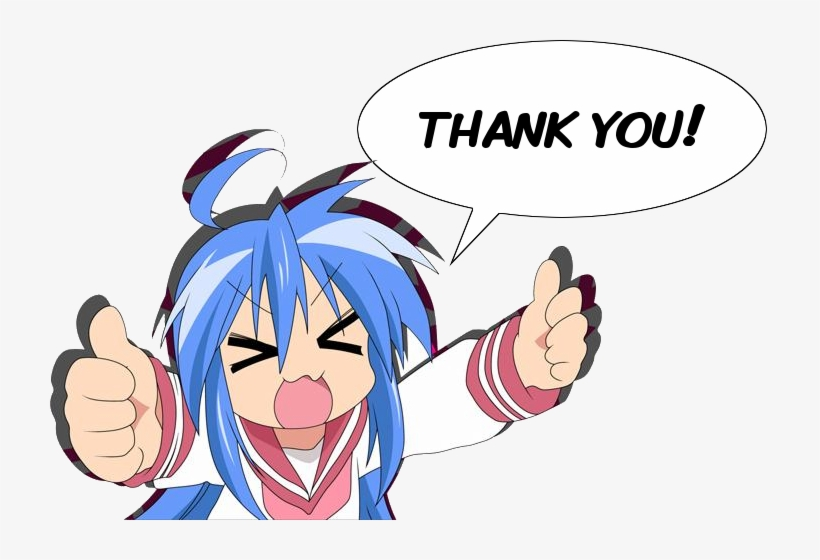